#### RANDOM WALK GENERATION

$\frac{S_{t+dt}-S_{t}}{S{t}} = \mu dt + \sigma \sqrt{dt}\xi_{t}$

The equation gives the change in price divided by price.
Goal: to generate random stock prices and random returns.


In [15]:
import numpy as np
import pandas as pd


def gbm(n_years = 10, n_scenarios = 1000, mu =0.07, sigma=0.15, steps_per_year=12, s_0=100):
    '''
     Evolution of a stock price using a Geometric Brownian Motion Model
     n_years worth of returns
     n_scenarios --> different versions
     dt --> micro step, move time forward, generate a stock return.
     s_0 --> initial stock price
     xi is a random normal
     '''
    dt = 1/steps_per_year   # year divided by steps
    n_steps = int(n_years*steps_per_year)
    xi = np.random.normal(size=(n_steps, n_scenarios))
    returns = mu * dt + sigma * np.sqrt(dt)*xi
    returns = pd.DataFrame(returns)
    # to prices
    prices = s_0*(1+returns).cumprod()
    return prices

In [16]:
# Generate 10 years worth of stock prices, starting with the number of scenarios = 3
p = gbm(10, n_scenarios=3)

In [17]:
p.shape

(120, 3)

In [18]:
p.head()

,0,1,2
0,109.374374,98.894888,97.965705
1,115.279439,90.730518,98.707965
2,123.349190,83.595119,104.271606
3,124.791289,77.516887,101.158880
4,126.891143,80.617711,106.020015


We started with a stock price of 100. Then each column shows a possible evolution of stock prices. 

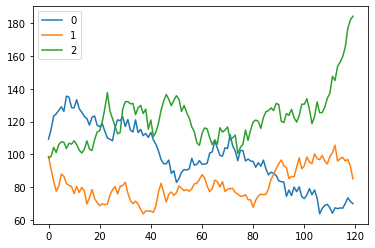

In [19]:
p.plot()

This is Geometric Brownian motion. We will try to refine this now.

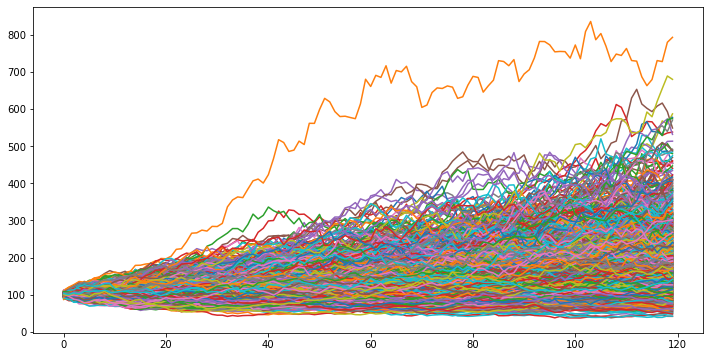

In [20]:
# 1000 scenarios
p = gbm(n_years=10, n_scenarios=1000).plot(figsize=(12,6), legend=False)

In [21]:
p = gbm(n_years=10, n_scenarios=1000)
p

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,93.129811,98.190543,98.963222,102.277227,100.321132,103.475468,96.584093,104.625539,103.531881,104.697314,...,88.801945,98.997241,109.011579,102.155270,102.594532,102.242862,103.534310,103.319972,105.178237,92.511446
1,95.045096,87.864684,90.817896,96.420117,103.477744,100.860006,92.229160,113.186757,104.834946,101.493229,...,94.983382,96.963812,104.230874,100.666470,110.568197,104.869527,101.690376,105.955310,104.659943,89.996444
2,94.540432,86.645968,96.749690,97.925471,107.597994,96.981326,92.132694,108.667427,102.699261,99.595106,...,91.239570,88.564564,111.026661,107.737597,110.034791,108.946769,106.917847,106.498439,102.449641,89.446990
3,92.598821,81.478788,88.584751,98.415867,105.128647,95.378251,95.795723,113.453447,105.284246,100.432743,...,95.870398,87.603624,112.039599,100.199969,118.848741,110.122663,104.684304,113.894689,92.012123,92.076606
4,94.869315,77.608331,86.346906,93.612077,108.548081,102.160980,93.877141,118.769169,113.349298,93.178117,...,96.898207,86.084542,103.744947,98.465116,118.826420,113.811161,108.843695,114.980984,92.795059,91.029230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,352.006150,396.178071,217.074092,192.654965,238.435857,266.746528,141.854654,265.104710,129.236061,90.253338,...,148.057321,319.596615,118.639246,126.711284,195.591448,315.888374,112.278062,191.834920,168.569787,233.182456
116,360.763523,409.882623,211.372283,193.957978,217.138943,260.991426,150.105468,254.074313,123.071822,86.266555,...,159.104451,319.598177,121.734362,124.441605,201.535254,306.174866,111.037998,189.065771,163.934814,238.920234
117,352.389600,415.316186,220.928782,193.961554,208.976904,265.082398,147.029389,266.766371,125.576434,89.575170,...,161.183932,305.180442,129.150461,133.002215,215.983398,293.645991,110.759972,186.890373,163.578653,230.074398
118,355.396639,424.905223,204.063181,193.560296,229.895763,252.779844,150.208401,249.864265,130.790380,95.289679,...,165.768625,317.663371,121.597682,129.115289,231.762793,304.325373,109.470567,197.843682,166.941056,234.968478


In [22]:
# Optimizing the code by reducing for loops to increase efficiency 
def gbm0(n_years = 10, n_scenarios = 1000, mu =0.07, sigma=0.15, steps_per_year=12, s_0=100):
    '''
     Evolution of a stock price using a Geometric Brownian Motion Model
     n_years worth of returns
     n_scenarios --> different versions
     dt --> micro step, move time forward, generate a stock return.
     s_0 --> initial stock price
     xi is a random normal
     '''
    dt = 1/steps_per_year   # year divided by steps
    n_steps = int(n_years*steps_per_year)
    
    # returns = mu * dt + sigma * np.sqrt(dt)*xi # This is scaling the random number by multiplying it.
    # Instead you can generate random numbers with a different mean and a different standard deviation.
    
    # change the location or mean and change the scale or standard deviation
    returns_plus_1= np.random.normal(loc=(1+mu*dt) , scale=(sigma*np.sqrt(dt)), size=(n_steps, n_scenarios)) 
    # it is centered at mu*dt and scaled by sigma*np.sqrt(dt) 
    
    # We always use 1 + returns. We can avoid that for loop.
    
    prices = s_0  * pd.DataFrame(returns_plus_1).cumprod()
    return prices

In [23]:
%timeit gbm0(n_years=5, n_scenarios=1000)

3.34 ms ± 147 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [24]:
%timeit gbm(n_years=5, n_scenarios=1000)

3.53 ms ± 96.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


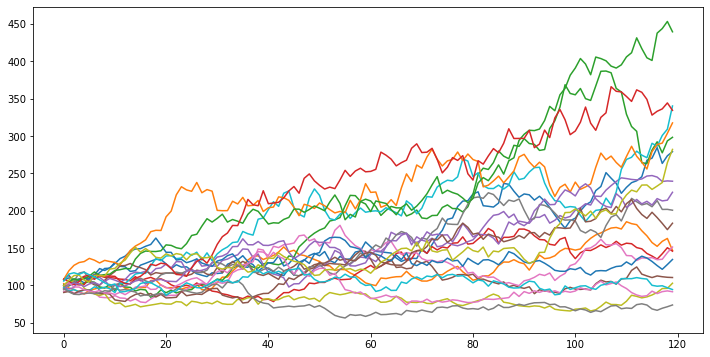

In [25]:
gbm0(n_years=10, n_scenarios=20).plot(legend=False, figsize=(12,6))

In [26]:
# To include the starting stock price
def gbm1(n_years = 10, n_scenarios = 1000, mu =0.07, sigma=0.15, steps_per_year=12, s_0=100):
    dt = 1/steps_per_year   # year divided by steps
    n_steps = int(n_years*steps_per_year)
    returns_plus_1= np.random.normal(loc=(1+mu*dt) , scale=(sigma*np.sqrt(dt)), size=(n_steps, n_scenarios)) 
    returns_plus_1[0] = 1 # the return is zero
    prices = s_0  * pd.DataFrame(returns_plus_1).cumprod()
    return prices

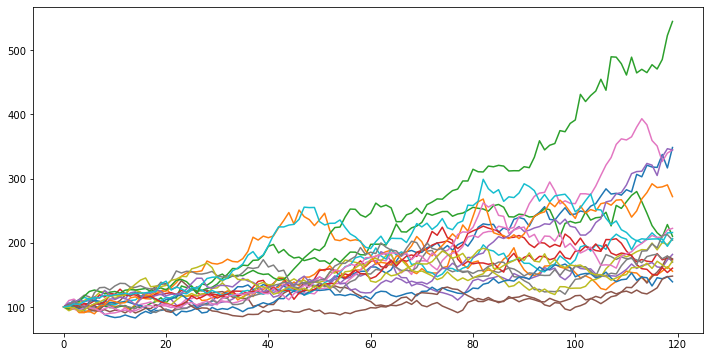

In [27]:
gbm1(n_years=10, n_scenarios=20).plot(legend=False, figsize=(12,6))

In [28]:
gbm1(n_scenarios=10)

,0,1,2,3,4,5,6,7,8,9
0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,99.729442,97.992306,102.454793,104.949701,96.038055,108.674261,105.667629,97.300670,96.304667,90.187474
2,98.630294,100.427405,109.245854,106.201224,99.856358,106.882624,107.715662,101.520838,96.579667,99.611154
3,96.693572,98.482704,111.153768,106.417748,100.570153,106.142429,109.048854,108.940701,102.119646,93.346909
4,99.713257,98.143315,113.507263,109.992878,111.064369,107.559270,106.375992,116.122101,105.974689,92.010847
...,...,...,...,...,...,...,...,...,...,...
115,460.781609,97.608570,273.468239,196.448990,161.677598,84.607114,133.046100,160.326013,220.191718,180.843607
116,437.542491,93.879161,293.124449,200.639956,163.089597,93.197881,123.673047,156.831239,231.079112,179.725067
117,444.730962,90.299399,293.799306,190.294272,153.210206,89.827406,121.869692,155.175618,225.635317,189.939212
118,430.427518,89.027660,292.690205,201.045466,154.642858,91.617637,120.394792,159.820561,222.345955,208.181474


Now, the first row shows the stock price you started with.